In [1]:
from matplotlib import pyplot as plt
from systemclass import SNAIL,SNAIL_sweep,Cavity, SNAILC, SNAILC_sweep, SNAILCC, SNAILCC_sweep
import numpy as np
from joblib import Parallel, delayed
import qutip as qt
from qutip import propagator,floquet_modes,Qobj,Options,basis

flux = 0.403925
#snail parameters
EJ = 100*2*np.pi
EC = 0.177*2*np.pi
beta = 0.12
ng = 0
ncut = 300
N = 3
dims = 20
snail = SNAIL(EJ,EC,beta,ng,ncut,flux,N,dims)
Hs,charge_op = snail.spectrum_charge()

total_dim = dims
H0 = Qobj(Hs)
Hc = Qobj(charge_op)
psi0 = qt.basis(total_dim, 0)

print(Hs/2/np.pi)


ModuleNotFoundError: No module named 'autograd'

In [345]:
snail.omegas/2/np.pi

6.015522789935431

In [354]:
def gaussian_ramp(initial_time,t0, amplitude):
    """
    Creates a time-dependent function using a Gaussian function that starts near zero,
    peaks at 'amplitude' at time 't0', and remains constant at 'amplitude' for t > t0.

    Args:
    t0 (float): The time at which the function peaks at the amplitude.
    amplitude (float): The maximum amplitude of the Gaussian peak.

    Returns:
    function: A function of time 't' that implements the desired behavior.
    """
    # Define the standard deviation such that the peak is sharp at t0
    sigma = t0 / 3  # Adjust sigma to make the function start close to zero at t=0

    # Define the function using a closure to encapsulate the parameters
    def time_dependent_function(t):
        t00 = t0-initial_time
        if t<=initial_time:
            return 0
        if t <= t0:
#             t = t-initial_time
            
            # Gaussian function centered at t0
            return amplitude * np.exp(-((t - t0)**2) / (2 * sigma**2)) - amplitude * np.exp(-((initial_time - t0)**2) / (2 * sigma**2))
        else:
            # Return constant amplitude for t > t0
            return amplitude- amplitude * np.exp(-((initial_time - t0)**2) / (2 * sigma**2))

    return time_dependent_function
tlist = np.linspace(0, 2500, 100000)  # Cover ten periods
func = gaussian_ramp(0,1000, 0.003* 2 * np.pi)
func2 = gaussian_ramp(1000,1000+500, 9* 2 * np.pi)

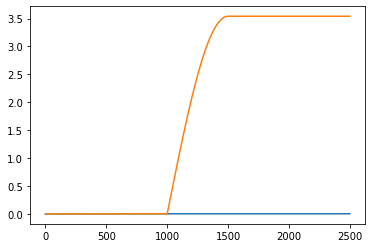

In [355]:
plt.plot(tlist,[func(t)/2/np.pi for t in tlist])
plt.plot(tlist,[func2(t)/2/np.pi for t in tlist])

In [356]:
omega = 6.01 * 2 * np.pi
omega1 = 4*2*np.pi
T = (2*np.pi)/omega
args = {'w': omega,'w1':omega1}
tlist = np.linspace(0, 2000, 100000)  # Cover ten periods
H = [H0, [Hc, lambda t, args: func(t)*np.cos(args['w']*t)],[Hc, lambda t, args: func2(t)*np.cos(args['w1']*t)]]
#     options = Options(nsteps=100000)  # Increasing nsteps to 10000, adjust as needed
result = qt.sesolve(H, psi0, tlist, args=args)

In [360]:
pop0 = [abs(state[0, 0])**2 for state in result.states]
pop1 = [abs(state[1, 0])**2 for state in result.states]
pop2 = [abs(state[2, 0])**2 for state in result.states]
pop3 = [abs(state[3, 0])**2 for state in result.states]
pop4 = [abs(state[-2, 0])**2 for state in result.states]
pop6 = [abs(state[-1, 0])**2 for state in result.states]

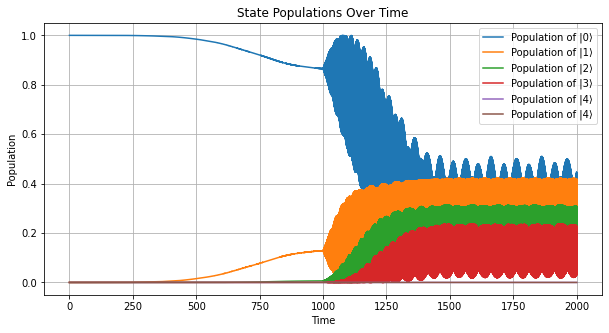

In [361]:
plt.figure(figsize=(10, 5))
plt.plot(tlist, pop0, label="Population of |0⟩")
plt.plot(tlist, pop1, label="Population of |1⟩")
plt.plot(tlist, pop2, label="Population of |2⟩")
plt.plot(tlist, pop3, label="Population of |3⟩")
plt.plot(tlist, pop4, label="Population of |4⟩")
plt.plot(tlist, pop6, label="Population of |4⟩")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("State Populations Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [371]:
max([abs(state[-9, 0])**2 for state in result.states])

0.00042870986636731284

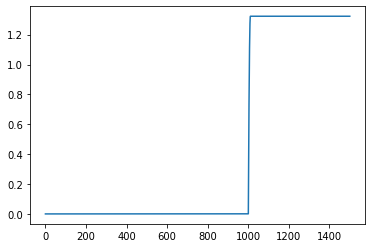

In [305]:
func = gaussian_ramp(0,1000, 0.00* 2 * np.pi)
func2 = gaussian_ramp(1000,1000+10, 3000* 2 * np.pi)
plt.plot(tlist,[func2(t)/2/np.pi for t in tlist])

In [306]:
omega = 6.01 * 2 * np.pi
omega1 = 4*2*np.pi
T = (2*np.pi)/omega
args = {'w': omega,'w1':omega1}
tlist = np.linspace(0, 1500, 200000)  # Cover ten periods
H = [H0, [Hc, lambda t, args: func(t)*np.cos(args['w']*t)],[Hc, lambda t, args: func2(t)*np.cos(args['w1']*t)]]
#     options = Options(nsteps=100000)  # Increasing nsteps to 10000, adjust as needed
result = qt.sesolve(H, psi0, tlist, args=args)

In [307]:
pop0 = [abs(state[0, 0])**2 for state in result.states]
pop1 = [abs(state[1, 0])**2 for state in result.states]
pop2 = [abs(state[2, 0])**2 for state in result.states]
pop3 = [abs(state[3, 0])**2 for state in result.states]
pop4 = [abs(state[4, 0])**2 for state in result.states]
pop6 = [abs(state[-1, 0])**2 for state in result.states]

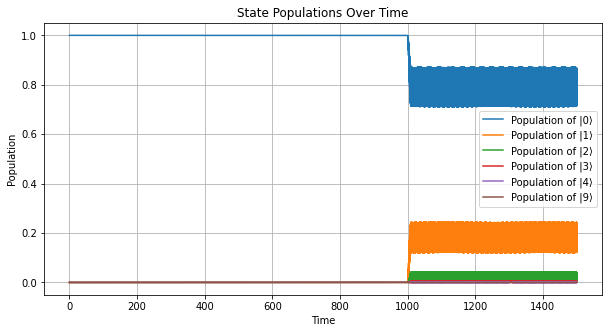

In [308]:
plt.figure(figsize=(10, 5))
plt.plot(tlist, pop0, label="Population of |0⟩")
plt.plot(tlist, pop1, label="Population of |1⟩")
plt.plot(tlist, pop2, label="Population of |2⟩")
plt.plot(tlist, pop3, label="Population of |3⟩")
plt.plot(tlist, pop4, label="Population of |4⟩")
plt.plot(tlist, pop6, label="Population of |9⟩")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("State Populations Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [309]:
max(pop6)

4.391579801290077e-06